<a href="https://colab.research.google.com/github/Sebastiao199/datathon_realestate/blob/main/geojsonfiles_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.6 MB/s eta 0:00:00


In [2]:
pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import mapclassify
import plotly.express as px

In [4]:
#path_to_data = gpd.datasets.get_path('https://github.com/Gierko/Hackathon-11th-to-13th-January/blob/main/departements_france.geojson')
#path_to_data = gpd.read_file('https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/departements_france.geojson')
departments_france = gpd.read_file('https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/departements_france.geojson')

In [5]:
departments_france

,code,nom,geometry
0,01,Ain,"POLYGON ((4.78020 46.17670, 4.78020 46.17710, ..."
1,02,Aisne,"POLYGON ((3.17300 50.01130, 3.17340 50.01150, ..."
2,2B,Haute-Corse,"MULTIPOLYGON (((9.40870 43.02230, 9.40840 43.0..."
3,2A,Corse-du-Sud,"MULTIPOLYGON (((8.58640 41.87390, 8.58620 41.8..."
4,03,Allier,"POLYGON ((3.03210 46.79490, 3.03210 46.79410, ..."
...,...,...,...
91,91,Essonne,"POLYGON ((2.22660 48.77610, 2.22710 48.77610, ..."
92,92,Hauts-de-Seine,"POLYGON ((2.29100 48.95100, 2.29160 48.95080, ..."
93,93,Seine-Saint-Denis,"POLYGON ((2.55310 49.00980, 2.55340 49.00990, ..."
94,94,Val-de-Marne,"POLYGON ((2.33190 48.81700, 2.33210 48.81700, ..."


In [6]:
type(departments_france['code'][0])

str

In [7]:
# departments_france.plot(column="geometry",  cmap='YlGnBu', legend=True, k=10, figsize=(20, 15))

In [8]:
departments_ile_de_france = departments_france[(departments_france['code'] == '75') | (departments_france['code'] == '92') | (departments_france['code'] == '93') | (departments_france['code'] == '94') | (departments_france['code'] == '77') | (departments_france['code'] == '78') | (departments_france['code'] == '91') | (departments_france['code'] == '95')]
departments_ile_de_france

,code,nom,geometry
75,75,Paris,"POLYGON ((2.33190 48.81700, 2.33250 48.81820, ..."
77,77,Seine-et-Marne,"POLYGON ((2.57170 48.69200, 2.57170 48.69260, ..."
78,78,Yvelines,"POLYGON ((1.60880 49.07790, 1.60890 49.07760, ..."
91,91,Essonne,"POLYGON ((2.22660 48.77610, 2.22710 48.77610, ..."
92,92,Hauts-de-Seine,"POLYGON ((2.29100 48.95100, 2.29160 48.95080, ..."
93,93,Seine-Saint-Denis,"POLYGON ((2.55310 49.00980, 2.55340 49.00990, ..."
94,94,Val-de-Marne,"POLYGON ((2.33190 48.81700, 2.33210 48.81700, ..."
95,95,Val-d'Oise,"POLYGON ((2.59050 49.07970, 2.58970 49.07920, ..."


In [9]:
# departments_ile_de_france.plot(column="nom", cmap='YlGnBu', legend=True, scheme='naturalbreaks', k=10, figsize=(20, 15))

In [10]:
type(departments_ile_de_france)

geopandas.geodataframe.GeoDataFrame

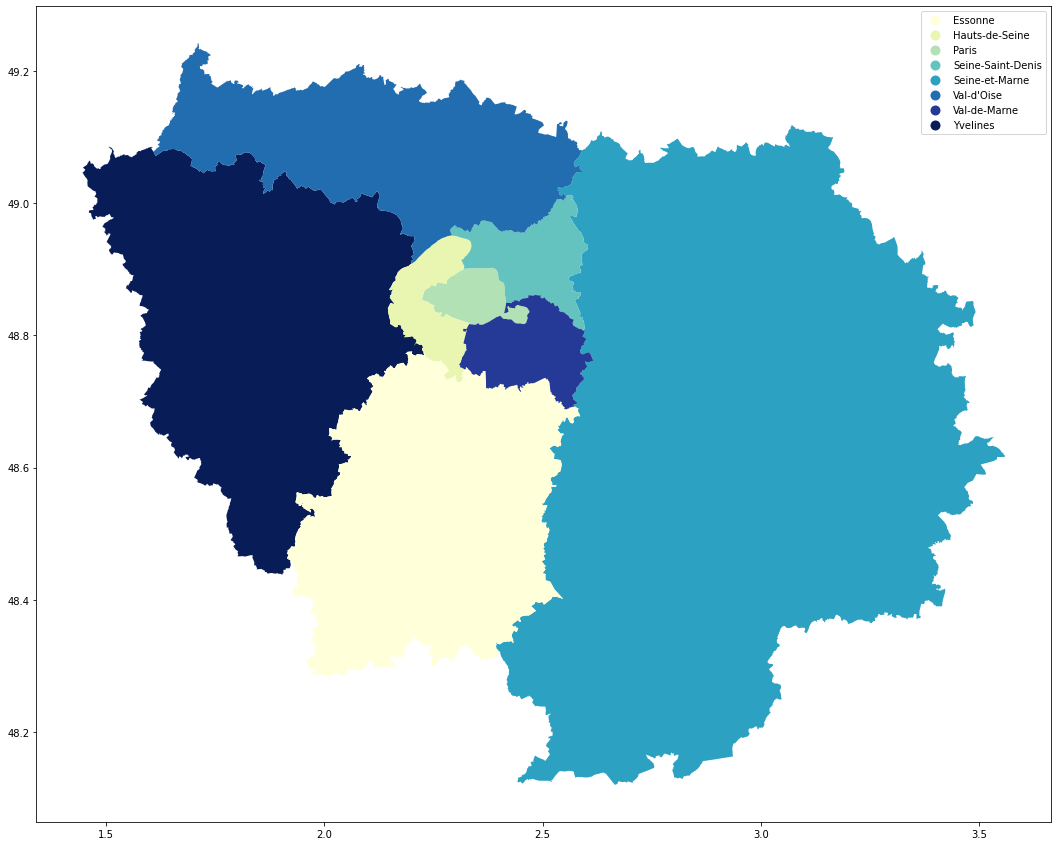

In [11]:
departments_ile_de_france.plot(column="nom", cmap='YlGnBu', legend=True, k=10, figsize=(20, 15))

In [12]:
# departments_ile_de_france.plot(column="nom", cmap='YlGnBu', legend=True, scheme='naturalbreaks', k=10, figsize=(20, 15))

In [13]:
ide_de_france_df = pd.read_csv('https://github.com/Sebastiao199/datathon_realestate/blob/main/df_1422.csv?raw=true')
ide_de_france_df

,Unnamed: 0,value,area,price_sqm,nr_rooms,type_local,comune,commune_code,department_code,deed_date
0,0,67000.0,30.0,2233.000000,1.0,appartement,ÃÂÃÂpinay-sur-Seine,93031,93,2014-01-02
1,1,166000.0,55.0,3018.000000,3.0,appartement,Triel-sur-Seine,78624,78,2014-01-02
2,2,401398.0,43.0,9334.000000,3.0,appartement,Paris 10e Arrondissement,75110,75,2014-01-02
3,3,140000.0,20.0,7000.000000,1.0,appartement,Paris 18e Arrondissement,75118,75,2014-01-02
4,4,297000.0,79.0,3759.000000,4.0,maison,Chelles,77108,77,2014-01-02
...,...,...,...,...,...,...,...,...,...,...
821124,821124,7211499.0,375.0,19230.664000,8.0,Appartement,PARIS 16,116,75,2022-06-30
821125,821125,7250000.0,688.0,10537.790698,9.0,Maison,NEUILLY-SUR-SEINE,51,92,2022-06-30
821126,821126,7576370.0,393.0,19278.295165,10.0,Appartement,PARIS 08,108,75,2022-06-30
821127,821127,8100000.0,649.0,12480.739599,8.0,Appartement,PARIS 07,107,75,2022-06-30


In [14]:
ide_de_france_df.drop(['Unnamed: 0'], axis = 1, inplace = True) 

In [15]:
type(ide_de_france_df['department_code'][0])

numpy.int64

In [16]:
departments_ile_de_france['code'] = departments_ile_de_france['code'].apply(lambda x: int(x))

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [17]:
ide_de_france_geo_df = ide_de_france_df.merge(departments_ile_de_france, left_on='department_code', right_on='code')
ide_de_france_geo_df

,value,area,price_sqm,nr_rooms,type_local,comune,commune_code,department_code,deed_date,code,nom,geometry
0,67000.0,30.0,2233.000000,1.0,appartement,ÃÂÃÂpinay-sur-Seine,93031,93,2014-01-02,93,Seine-Saint-Denis,"POLYGON ((2.55310 49.00980, 2.55340 49.00990, ..."
1,300000.0,76.0,3947.000000,3.0,maison,Le Blanc-Mesnil,93007,93,2014-01-02,93,Seine-Saint-Denis,"POLYGON ((2.55310 49.00980, 2.55340 49.00990, ..."
2,246000.0,63.0,3904.000000,3.0,maison,Drancy,93029,93,2014-01-02,93,Seine-Saint-Denis,"POLYGON ((2.55310 49.00980, 2.55340 49.00990, ..."
3,126000.0,55.0,2290.000000,3.0,appartement,Noisy-le-Grand,93051,93,2014-01-02,93,Seine-Saint-Denis,"POLYGON ((2.55310 49.00980, 2.55340 49.00990, ..."
4,168000.0,35.0,4800.000000,2.0,appartement,Pantin,93055,93,2014-01-02,93,Seine-Saint-Denis,"POLYGON ((2.55310 49.00980, 2.55340 49.00990, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
821124,1794000.0,121.0,14826.446281,6.0,Maison,AVRAINVILLE,41,91,2022-06-24,91,Essonne,"POLYGON ((2.22660 48.77610, 2.22710 48.77610, ..."
821125,1800000.0,137.0,13138.686131,5.0,Appartement,GOMETZ-LE-CHATEL,275,91,2022-06-24,91,Essonne,"POLYGON ((2.22660 48.77610, 2.22710 48.77610, ..."
821126,2200000.0,144.0,15277.777778,5.0,Maison,CHILLY MAZARIN,161,91,2022-06-29,91,Essonne,"POLYGON ((2.22660 48.77610, 2.22710 48.77610, ..."
821127,2200000.0,158.0,13924.050633,7.0,Maison,JUVISY SUR ORGE,326,91,2022-06-29,91,Essonne,"POLYGON ((2.22660 48.77610, 2.22710 48.77610, ..."


In [18]:
ide_de_france_geo_df.drop(['code'], axis = 1, inplace = True) 

In [19]:
ide_de_france_geo_df

,value,area,price_sqm,nr_rooms,type_local,comune,commune_code,department_code,deed_date,nom,geometry
0,67000.0,30.0,2233.000000,1.0,appartement,ÃÂÃÂpinay-sur-Seine,93031,93,2014-01-02,Seine-Saint-Denis,"POLYGON ((2.55310 49.00980, 2.55340 49.00990, ..."
1,300000.0,76.0,3947.000000,3.0,maison,Le Blanc-Mesnil,93007,93,2014-01-02,Seine-Saint-Denis,"POLYGON ((2.55310 49.00980, 2.55340 49.00990, ..."
2,246000.0,63.0,3904.000000,3.0,maison,Drancy,93029,93,2014-01-02,Seine-Saint-Denis,"POLYGON ((2.55310 49.00980, 2.55340 49.00990, ..."
3,126000.0,55.0,2290.000000,3.0,appartement,Noisy-le-Grand,93051,93,2014-01-02,Seine-Saint-Denis,"POLYGON ((2.55310 49.00980, 2.55340 49.00990, ..."
4,168000.0,35.0,4800.000000,2.0,appartement,Pantin,93055,93,2014-01-02,Seine-Saint-Denis,"POLYGON ((2.55310 49.00980, 2.55340 49.00990, ..."
...,...,...,...,...,...,...,...,...,...,...,...
821124,1794000.0,121.0,14826.446281,6.0,Maison,AVRAINVILLE,41,91,2022-06-24,Essonne,"POLYGON ((2.22660 48.77610, 2.22710 48.77610, ..."
821125,1800000.0,137.0,13138.686131,5.0,Appartement,GOMETZ-LE-CHATEL,275,91,2022-06-24,Essonne,"POLYGON ((2.22660 48.77610, 2.22710 48.77610, ..."
821126,2200000.0,144.0,15277.777778,5.0,Maison,CHILLY MAZARIN,161,91,2022-06-29,Essonne,"POLYGON ((2.22660 48.77610, 2.22710 48.77610, ..."
821127,2200000.0,158.0,13924.050633,7.0,Maison,JUVISY SUR ORGE,326,91,2022-06-29,Essonne,"POLYGON ((2.22660 48.77610, 2.22710 48.77610, ..."


In [20]:
ide_de_france_geo_df

,value,area,price_sqm,nr_rooms,type_local,comune,commune_code,department_code,deed_date,nom,geometry
0,67000.0,30.0,2233.000000,1.0,appartement,ÃÂÃÂpinay-sur-Seine,93031,93,2014-01-02,Seine-Saint-Denis,"POLYGON ((2.55310 49.00980, 2.55340 49.00990, ..."
1,300000.0,76.0,3947.000000,3.0,maison,Le Blanc-Mesnil,93007,93,2014-01-02,Seine-Saint-Denis,"POLYGON ((2.55310 49.00980, 2.55340 49.00990, ..."
2,246000.0,63.0,3904.000000,3.0,maison,Drancy,93029,93,2014-01-02,Seine-Saint-Denis,"POLYGON ((2.55310 49.00980, 2.55340 49.00990, ..."
3,126000.0,55.0,2290.000000,3.0,appartement,Noisy-le-Grand,93051,93,2014-01-02,Seine-Saint-Denis,"POLYGON ((2.55310 49.00980, 2.55340 49.00990, ..."
4,168000.0,35.0,4800.000000,2.0,appartement,Pantin,93055,93,2014-01-02,Seine-Saint-Denis,"POLYGON ((2.55310 49.00980, 2.55340 49.00990, ..."
...,...,...,...,...,...,...,...,...,...,...,...
821124,1794000.0,121.0,14826.446281,6.0,Maison,AVRAINVILLE,41,91,2022-06-24,Essonne,"POLYGON ((2.22660 48.77610, 2.22710 48.77610, ..."
821125,1800000.0,137.0,13138.686131,5.0,Appartement,GOMETZ-LE-CHATEL,275,91,2022-06-24,Essonne,"POLYGON ((2.22660 48.77610, 2.22710 48.77610, ..."
821126,2200000.0,144.0,15277.777778,5.0,Maison,CHILLY MAZARIN,161,91,2022-06-29,Essonne,"POLYGON ((2.22660 48.77610, 2.22710 48.77610, ..."
821127,2200000.0,158.0,13924.050633,7.0,Maison,JUVISY SUR ORGE,326,91,2022-06-29,Essonne,"POLYGON ((2.22660 48.77610, 2.22710 48.77610, ..."


In [21]:
type(ide_de_france_geo_df)

pandas.core.frame.DataFrame

In [22]:
# ide_de_france_geo_df['geometry'] = gpd.GeoSeries.from_wkt(ide_de_france_geo_df['geometry'])
my_geo_df = gpd.GeoDataFrame(ide_de_france_geo_df, geometry='geometry')

In [23]:
my_geo_df

,value,area,price_sqm,nr_rooms,type_local,comune,commune_code,department_code,deed_date,nom,geometry
0,67000.0,30.0,2233.000000,1.0,appartement,ÃÂÃÂpinay-sur-Seine,93031,93,2014-01-02,Seine-Saint-Denis,"POLYGON ((2.55310 49.00980, 2.55340 49.00990, ..."
1,300000.0,76.0,3947.000000,3.0,maison,Le Blanc-Mesnil,93007,93,2014-01-02,Seine-Saint-Denis,"POLYGON ((2.55310 49.00980, 2.55340 49.00990, ..."
2,246000.0,63.0,3904.000000,3.0,maison,Drancy,93029,93,2014-01-02,Seine-Saint-Denis,"POLYGON ((2.55310 49.00980, 2.55340 49.00990, ..."
3,126000.0,55.0,2290.000000,3.0,appartement,Noisy-le-Grand,93051,93,2014-01-02,Seine-Saint-Denis,"POLYGON ((2.55310 49.00980, 2.55340 49.00990, ..."
4,168000.0,35.0,4800.000000,2.0,appartement,Pantin,93055,93,2014-01-02,Seine-Saint-Denis,"POLYGON ((2.55310 49.00980, 2.55340 49.00990, ..."
...,...,...,...,...,...,...,...,...,...,...,...
821124,1794000.0,121.0,14826.446281,6.0,Maison,AVRAINVILLE,41,91,2022-06-24,Essonne,"POLYGON ((2.22660 48.77610, 2.22710 48.77610, ..."
821125,1800000.0,137.0,13138.686131,5.0,Appartement,GOMETZ-LE-CHATEL,275,91,2022-06-24,Essonne,"POLYGON ((2.22660 48.77610, 2.22710 48.77610, ..."
821126,2200000.0,144.0,15277.777778,5.0,Maison,CHILLY MAZARIN,161,91,2022-06-29,Essonne,"POLYGON ((2.22660 48.77610, 2.22710 48.77610, ..."
821127,2200000.0,158.0,13924.050633,7.0,Maison,JUVISY SUR ORGE,326,91,2022-06-29,Essonne,"POLYGON ((2.22660 48.77610, 2.22710 48.77610, ..."


In [24]:
my_geo_df['department_code'].value_counts()

75    218275
92    113926
94     89159
78     87554
93     80615
91     79402
77     76895
95     75303
Name: department_code, dtype: int64

In [25]:
result_groupby = my_geo_df.groupby(['department_code']).mean()
result_groupby

,value,area,price_sqm,nr_rooms,commune_code
department_code,,,,,
75,491426.381299,49.824057,9653.641966,2.302256,50119.668437
77,243173.126614,81.638715,3137.714008,3.782704,34175.848950
78,348682.150433,83.316296,4271.198896,3.760833,39902.811671
91,264524.620763,81.852636,3349.713233,3.821088,45077.807839
92,424747.423325,62.409406,6701.921953,2.875296,51576.542010
93,249396.871477,63.736550,4113.982093,3.080407,53085.195882
94,325810.580656,66.161016,5115.696087,3.123566,51440.951256
95,266902.002944,79.105188,3503.329876,3.693372,48251.990359


In [26]:
group_by_merge_geo = result_groupby.merge(departments_ile_de_france, left_on='department_code', right_on='code')
group_by_merge_geo

,value,area,price_sqm,nr_rooms,commune_code,code,nom,geometry
0,491426.381299,49.824057,9653.641966,2.302256,50119.668437,75,Paris,"POLYGON ((2.33190 48.81700, 2.33250 48.81820, ..."
1,243173.126614,81.638715,3137.714008,3.782704,34175.848950,77,Seine-et-Marne,"POLYGON ((2.57170 48.69200, 2.57170 48.69260, ..."
2,348682.150433,83.316296,4271.198896,3.760833,39902.811671,78,Yvelines,"POLYGON ((1.60880 49.07790, 1.60890 49.07760, ..."
3,264524.620763,81.852636,3349.713233,3.821088,45077.807839,91,Essonne,"POLYGON ((2.22660 48.77610, 2.22710 48.77610, ..."
4,424747.423325,62.409406,6701.921953,2.875296,51576.542010,92,Hauts-de-Seine,"POLYGON ((2.29100 48.95100, 2.29160 48.95080, ..."
5,249396.871477,63.736550,4113.982093,3.080407,53085.195882,93,Seine-Saint-Denis,"POLYGON ((2.55310 49.00980, 2.55340 49.00990, ..."
6,325810.580656,66.161016,5115.696087,3.123566,51440.951256,94,Val-de-Marne,"POLYGON ((2.33190 48.81700, 2.33210 48.81700, ..."
7,266902.002944,79.105188,3503.329876,3.693372,48251.990359,95,Val-d'Oise,"POLYGON ((2.59050 49.07970, 2.58970 49.07920, ..."


In [27]:
final_geo = gpd.GeoDataFrame(group_by_merge_geo, geometry='geometry')

(1.34089, 3.6643100000000004, 48.06446, 49.297340000000005)

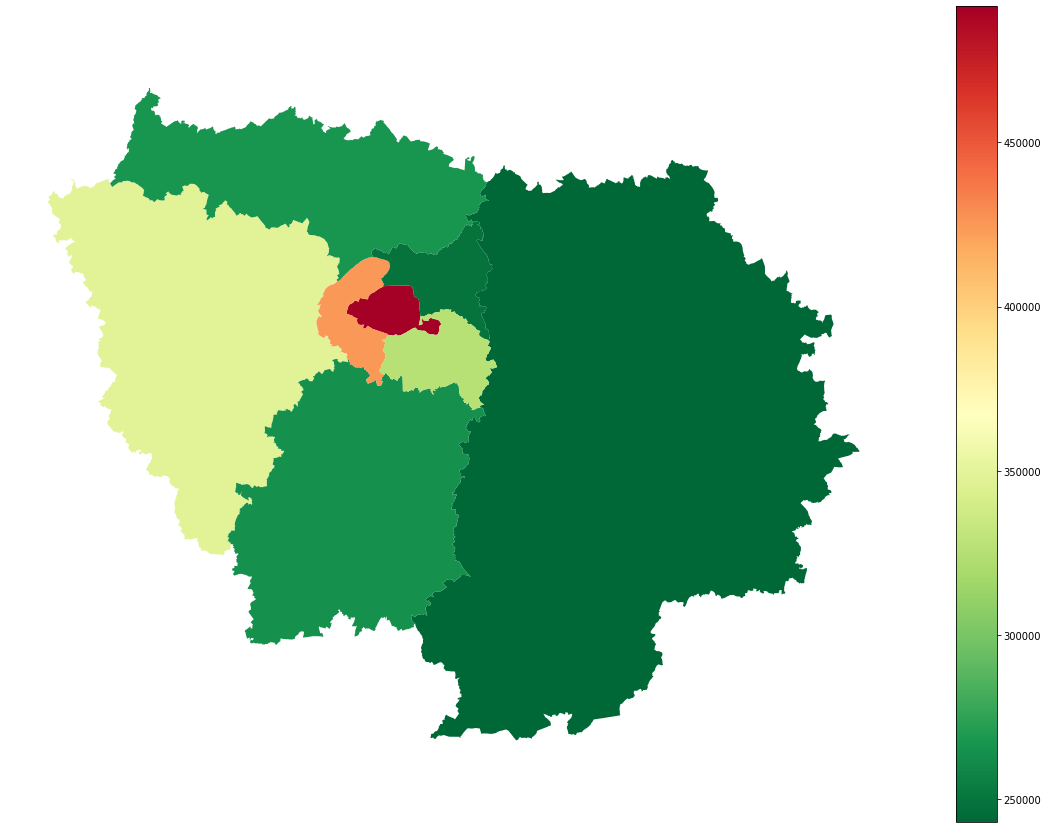

In [28]:
final_geo.plot(column="value", cmap='RdYlGn_r', legend=True, k=10, figsize=(20, 15))
# plt.title('Value Mean in Ile de France')
# plt.legend([final_geo['value'], final_geo['nom']]);
plt.axis('off')

(1.34089, 3.6643100000000004, 48.06446, 49.297340000000005)

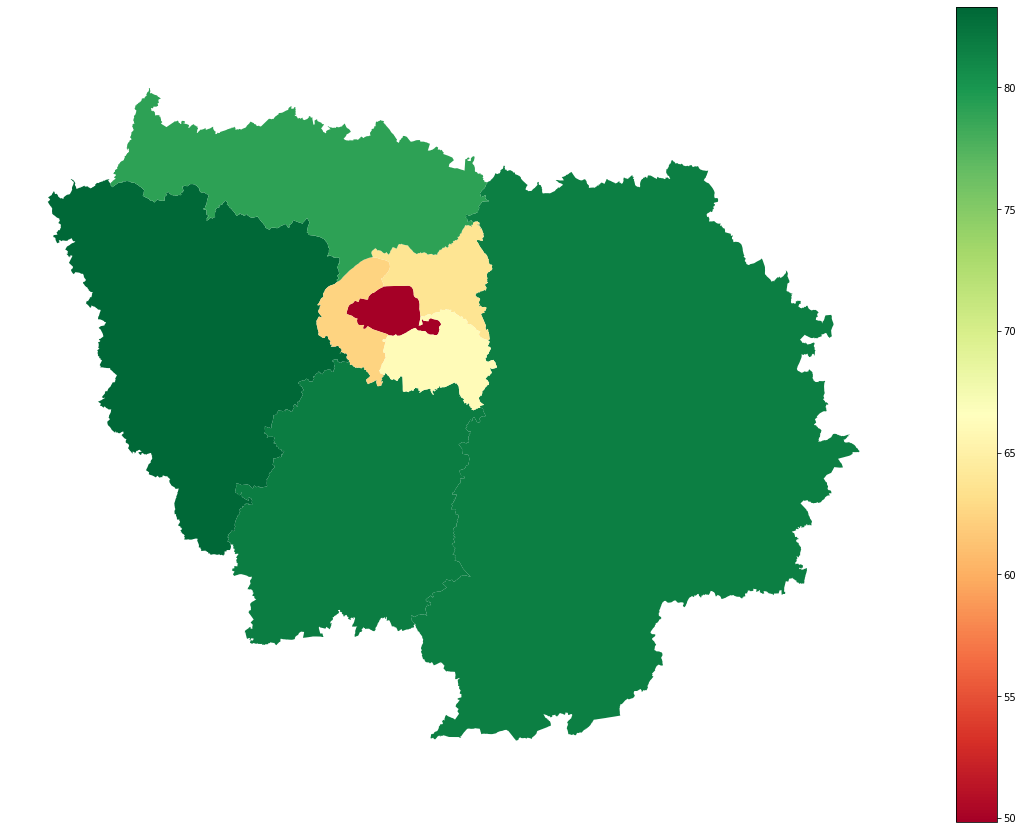

In [29]:
final_geo.plot(column="area", cmap='RdYlGn', legend=True, k=10, figsize=(20, 15))
# plt.title('Area Mean in Ile de France')
plt.axis('off')

(1.34089, 3.6643100000000004, 48.06446, 49.297340000000005)

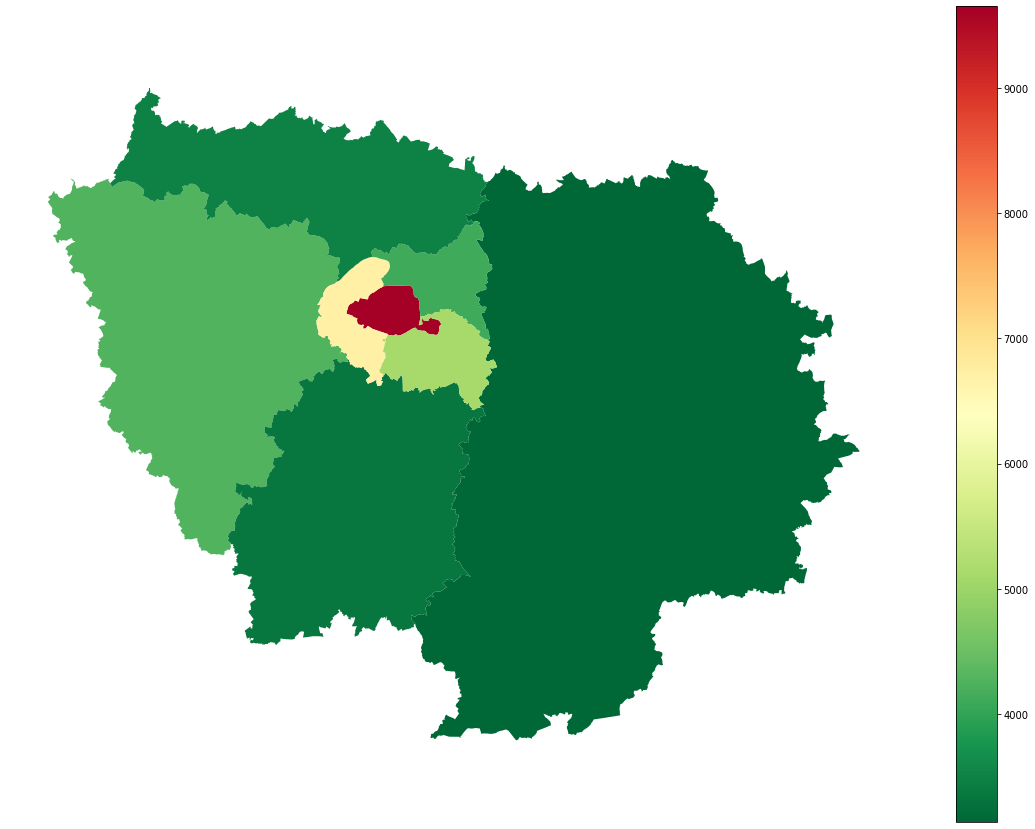

In [30]:
final_geo.plot(column="price_sqm", cmap='RdYlGn_r', legend=True, k=10, figsize=(20, 15))
# plt.title('Price per square meter Mean in Ile de France')
plt.axis('off')

(1.34089, 3.6643100000000004, 48.06446, 49.297340000000005)

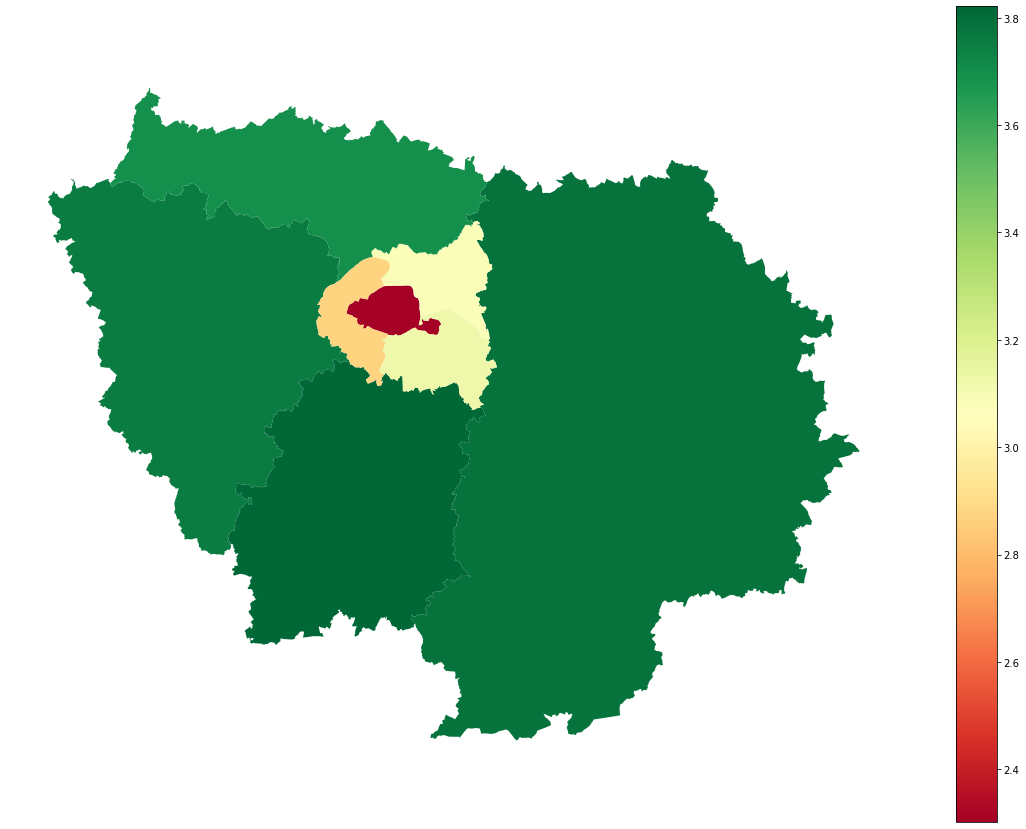

In [31]:
final_geo.plot(column="nr_rooms", cmap='RdYlGn', legend=True, k=10, figsize=(20, 15))
# plt.title('Number of rooms Mean in Ile de France')
plt.axis('off')

In [32]:
final_geo.to_csv('final_geo.csv')

In [33]:
# from urllib.request import urlopen
# import json
# with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
#     counties = json.load(response)

# import pandas as pd
# df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
#                    dtype={"fips": str})

# import plotly.express as px

# fig = px.choropleth(df, geojson=counties, locations='fips', color='unemp',
#                            color_continuous_scale="Viridis",
#                            range_color=(0, 12),
#                            scope="usa",
#                            labels={'unemp':'unemployment rate'}
#                           )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [34]:
# list_example = list(range(0,10))
# data = {"ola" : list_example,}
# df = pd.DataFrame(data)
# df

In [35]:

# df = px.data.election()
# geo_df = gpd.GeoDataFrame.from_features(
#     px.data.election_geojson()["features"]
# ).merge(df, on="district").set_index("district")

#center={"lat": 45.5517, "lon": -73.7073}
#mapbox_style="open-street-map"

# fig = px.choropleth_mapbox(final_geo,
#                            geojson=final_geo.geometry,
#                            locations=final_geo.commune_code,
#                            color="area",
#                            center={"lat": 48.864716, "lon": 2.349014},
#                            mapbox_style="carto-positron",
#                            zoom=7)
# fig.show()